# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on October 21 at 7pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://drive.google.com/open?id=0B4bdB5WPHGsqcmJMNmxzQmQ3aTQ) that we used in Homework 2-1.

We will continue to try to find culinary districts in Las Vegas. 

(As a reminder from last time, these are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness.)

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1.

Instead we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews.  As a reminder, LSA consists of using PCA applied to the document-term matrix.

LSA was covered in lecture, and there is another tutorial [here.](http://www.datascienceassn.org/sites/default/files/users/user1/lsa_presentation_final.pdf
)

**(20 pts)**

In [2]:
# link the review json file with bussiness json file

import json
import csv
import itertools
import sys
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
from collections import Counter
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import iterparse
from datetime import datetime
import csv
import numpy as np
import operator
from pprint import pprint
from collections import namedtuple
data = []
with open('yelp_academic_dataset_business.json') as data_file:
    for line in data_file:
        data.append(json.loads(line))
# obtain the top categories with restraurants
df_bussiness_yelp = pd.DataFrame(data)
df_yelp_lonlacity = df_bussiness_yelp[['business_id','city','longitude','latitude','categories']]
# obtain the city as LasVegas
df_yelp_lasvegas = df_yelp_lonlacity.loc[df_yelp_lonlacity['city'].isin(['Las Vegas'])]
drop_list = []
for index_i in range(len(df_yelp_lasvegas)):
    a = []
    b = []
    a = df_yelp_lasvegas.categories[df_yelp_lasvegas.index[index_i]]
    any_in2 = bool(set(a).intersection(['Restaurants']))
    if (any_in2):
        continue
    else:
        drop_list.append(index_i)
df_yelp_final = df_yelp_lasvegas.drop(df_yelp_lasvegas.index[drop_list])

In [3]:
# connect to obtain the reviews of each bussiness_id
data = []
with open('yelp_academic_dataset_review.json') as data_file:
    for line in data_file:
        data.append(json.loads(line))
df_reviews_yelp = pd.DataFrame(data)
df_yelp_final_review = df_reviews_yelp[['business_id','text']]

In [4]:
df_yelp_review_final = df_yelp_final.merge(df_yelp_final_review)
df_yelp_review_final.drop('categories',inplace=True, axis = 1)
combined_series_review = df_yelp_review_final.groupby(['business_id','latitude','longitude','city'])['text'].apply(list)

In [5]:
# for here we can get all the datasets well required for further operations
df_review_final2 = pd.DataFrame({'bussiness_id':np.array(combined_series_review.index.tolist())[:,0],'logitude':np.array(combined_series_review.index.tolist())[:,2],
              'latitude':np.array(combined_series_review.index.tolist())[:,1],
              'city':np.array(combined_series_review.index.tolist())[:,3],
              'reviews':combined_series_review.values})

In [6]:
df_review_final2

,bussiness_id,city,latitude,logitude,reviews
0,--jFTZmywe7StuZ2hEjxyA,Las Vegas,36.1188189268328,-115.18200516700699,[Wellll when I need lunch and I dont wanna ven...
1,--zgHBiQpr8H2ZqSdGmguQ,Las Vegas,36.106542,-115.17204,[This place is great. Second time there on Tue...
2,-1B-DEGkLE1kDj5ENAF2NQ,Las Vegas,36.1140789,-115.2408336,[If you're looking for Serbian food in Las Veg...
3,-1ERbsOf9XOC9wGbZYFr7g,Las Vegas,36.1594832749179,-115.351678373616,[New restaurant in Summerlin. Food was good. N...
4,-2n-OHbbwIv3SY8RP9bgTQ,Las Vegas,36.128222,-115.172986,"[At Maggiano's, the portions are huge, and we'..."
5,-36CwMJZJigqPMYrx9BJzw,Las Vegas,36.1104125,-115.2067011,[This TGI Friday's is located inside The Orlea...
6,-4mNZfAXMd2mxEsD2YRcaQ,Las Vegas,36.1089133,-115.1727284,[The Las Vegas Strip is the adult Disney Land....
7,-584fn2GxYe9sLsgN2WeQA,Las Vegas,36.2396354,-115.2259466,"[I've never lived in Chicago, but sometimes I ..."
8,-5RN56jH78MV2oquLV_G8g,Las Vegas,36.11199,-115.177001,[Master Chef Julian Serrano's French-Mediterra...
9,-5biAn5qQYk3X5NYlA98pw,Las Vegas,36.143672,-115.1409598,"[Featured in the ""Las Vegas Weekly"" (01/18 - 2..."


In [7]:
# make a list contains all of the reviews as a list of list of stings
big_review_list = df_review_final2.reviews.tolist()
big_review_list2 = []

for index_i in range(len(big_review_list)):
    temp_review_string = ''
    for index_j in range(len(big_review_list[index_i])):
       temp_review_string = temp_review_string + (big_review_list[index_i][index_j].lower())
    big_review_list2.append(temp_review_string)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
# Tfidf vectorizer:
#   - Strips out “stop words”
#   - Filters out terms that occur in more than half of the docs (max_df=0.5)
#   - Filters out terms that occur in only one document (min_df=2).
#   - Selects the 10,000 most frequently occuring words in the corpus.
#   - Normalizes the vector (L2 norm of 1.0) to normalize the effect of 
#     document length on the tf-idf values. 
vectorizer = TfidfVectorizer(max_df=0.8, 
                             min_df=4, stop_words='english',
                             use_idf=True)

X_train_tfidf = vectorizer.fit_transform(big_review_list2)
terms = vectorizer.get_feature_names()
# Project the tfidf vectors onto the first 150 principal components.
# Though this is significantly fewer features than the original tfidf vector,
# they are stronger features, and the accuracy is higher.
lsa = TruncatedSVD(10,algorithm ='randomized',random_state=42)
dtm_lsa = lsa.fit_transform(X_train_tfidf)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [9]:
dtm_dense = X_train_tfidf.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
np.sum(centered_dtm,axis=0)[:,:10]

matrix([[  4.89781826e-14,   1.32273749e-14,  -1.87079085e-15,
           2.02840674e-15,   9.08278173e-15,  -1.41033019e-15,
          -3.15487586e-16,   3.84231086e-16,  -1.43236660e-15,
          -1.19034557e-14]])

In [10]:
import scipy
from sklearn.utils.extmath import randomized_svd
u, s, vt = randomized_svd(X_train_tfidf, n_components=50, n_iter=5, random_state= None)

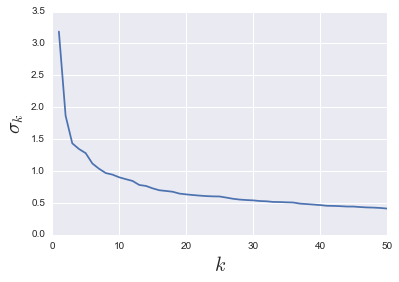

In [11]:
%matplotlib inline
Atraf = pd.DataFrame(vt,columns=vectorizer.get_feature_names())
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
fig = plt.figure(figsize=(6,4))
Anorm = np.linalg.norm(Atraf)
plt.plot(range(1,51),s[0:50]/Anorm)
plt.xlim([0,50])
plt.xlabel(r'$k$',size=20)
_ = plt.ylabel(r'$\sigma_k$',size=20)
# then set the number of principal components as 10.

# determination of k values

For here we determine the number of principal components as 10 based on the above plotting.

In [12]:
# # ri = []
# ss = []
# max = len(u)
# for k in range(1,50):
#     vectorsk = u[:,:k] @ np.diag(s[:k])
#     kmeans = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=10, random_state=0)
#     kmeans.fit_predict(vectorsk)
#     labelsk = kmeans.labels_
# #     ri.append(metrics.adjusted_rand_score(labelsk,news_data.target))
#     ss.append(metrics.silhouette_score(vectorsk,kmeans.labels_,metric='euclidean'))

In [13]:
# plt.plot(range(1,50),ss)
# plt.ylabel('Silhouette Score',size=20)
# plt.xlabel('No of Prin Comps',size=20)

In [14]:
df_3 = pd.DataFrame(lsa.components_,index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],columns =
vectorizer.get_feature_names())

In [15]:
df_2 = pd.DataFrame(dtm_lsa,columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],
            index = df_review_final2.bussiness_id)
df_2['bussiness_id'] = df_review_final2.bussiness_id
df_2

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,bussiness_id
bussiness_id,,,,,,,,,,,
--jFTZmywe7StuZ2hEjxyA,0.480986,-0.038229,-0.177481,-0.142915,-0.017122,0.374168,-0.688013,0.255150,-0.165699,-0.095143,NaN
--zgHBiQpr8H2ZqSdGmguQ,0.889589,-0.069774,0.008989,-0.173815,-0.102743,-0.212526,-0.038807,-0.155716,0.300709,-0.039599,NaN
-1B-DEGkLE1kDj5ENAF2NQ,0.936440,-0.161741,-0.068251,-0.171949,0.025267,-0.124611,-0.035863,0.052859,-0.205898,-0.007392,NaN
-1ERbsOf9XOC9wGbZYFr7g,0.899797,-0.188703,-0.132950,0.082742,-0.059272,-0.269314,0.119802,0.076268,-0.183097,-0.022316,NaN
-2n-OHbbwIv3SY8RP9bgTQ,0.860423,-0.105963,0.070926,-0.187686,0.010681,-0.393629,0.000604,0.072453,-0.211294,-0.056870,NaN
-36CwMJZJigqPMYrx9BJzw,0.895592,-0.121509,-0.046954,-0.258828,-0.154171,-0.209482,0.182387,0.078854,-0.081440,-0.013648,NaN
-4mNZfAXMd2mxEsD2YRcaQ,0.720617,-0.123730,-0.195633,-0.282098,-0.095486,0.274228,-0.218664,-0.090276,0.445783,0.092444,NaN
-584fn2GxYe9sLsgN2WeQA,0.737558,-0.074486,-0.210484,-0.340741,-0.126953,0.445310,0.248435,-0.025176,-0.113807,-0.018114,NaN
-5RN56jH78MV2oquLV_G8g,0.755582,-0.193869,0.120936,-0.210207,-0.032142,-0.519491,0.085021,0.079907,-0.218327,-0.022668,NaN


# The normalization
The normalization is to avoid the most weighted component always occupy the cluster labels. So I will do the normalization vertically first and the do the horizontal normalization next.

In [16]:
# try find link the latitude and longitude with the matrix:
from sklearn import preprocessing
list_longitude = df_review_final2.logitude.tolist()
list_latitude = df_review_final2.latitude.tolist()
scaled_long = preprocessing.scale(list_longitude)
scaled_latitude = preprocessing.scale(list_latitude)
# for index_row in range(len(X_list)):
#     X_list[index_row].insert(0,scaled_long[index_row]*4)
#     X_list[index_row].insert(0,scaled_latitude[index_row]*4)
# X_array_final = np.asarray(X_list)
# X_array_final_2 = X_array_final
# X_array_final
#don't change the array one more time.
list_scaled_long = list(scaled_long*4)
list_scaled_latitude = list(scaled_latitude*4)

In [17]:
X_list=[]
for i in range(len(list_scaled_long)):
    X_list.append((list_scaled_latitude[i],list_scaled_long[i]))
# X_list.append(list_scaled_long)
# X_list.append(list_scaled_latitude)
X_array_final = np.asarray(X_list)
X_array_final_2 = X_array_final
X_array_final_2

array([[-0.77601223,  0.58027255],
       [-1.64048738,  1.18894881],
       [-1.10977942, -3.01299092],
       ..., 
       [-1.40574902,  0.99814331],
       [ 0.11023838,  1.61797745],
       [ 4.62980082,  9.22595503]])

In [18]:
# now to vertical_normalize the dataframe
def vertical_normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def horizontal_normalize(df):
    result = df.div(df.sum(axis=1), axis=0)
    return result 

df_vertical_normalized = vertical_normalize(df_2)
df_hori_normalized = horizontal_normalize(df_vertical_normalized)
df_with_component = pd.DataFrame({'bussiness_id':df_hori_normalized.idxmax(axis = 1).index, 'component':df_hori_normalized.idxmax(axis = 1).values})
df_hori_normalized.insert(0,'longitude',X_array_final_2[:,0])
df_hori_normalized.insert(1,'latitude',X_array_final_2[:,1])
df_hori_normed = df_hori_normalized.drop('bussiness_id',axis = 1)
matrix_final_normed = df_hori_normed.values
matrix_final_normed2 = matrix_final_normed.astype(np.float)
np.max(matrix_final_normed2)

13.795439653245074

In [19]:
df_hori_normalized

,longitude,latitude,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,bussiness_id
bussiness_id,,,,,,,,,,,,,
--jFTZmywe7StuZ2hEjxyA,-0.776012,0.580273,0.111697,0.0553518,0.0937761,0.0743132,0.119487,0.20588,0.0186969,0.193728,0.0773889,0.0496816,NaN
--zgHBiQpr8H2ZqSdGmguQ,-1.640487,1.188949,0.20853,0.0411374,0.112491,0.0571729,0.0859022,0.07423,0.127325,0.0921822,0.148572,0.0524581,NaN
-1B-DEGkLE1kDj5ENAF2NQ,-1.109779,-3.012991,0.227208,0.0241028,0.101551,0.0590231,0.112581,0.0917018,0.131111,0.132542,0.0603657,0.0598139,NaN
-1ERbsOf9XOC9wGbZYFr7g,2.087352,-9.783433,0.213339,0.0185001,0.0885373,0.109491,0.0948848,0.0650294,0.155984,0.134631,0.0634814,0.0561224,NaN
-2n-OHbbwIv3SY8RP9bgTQ,-0.113898,1.131167,0.214066,0.0365211,0.131682,0.0580964,0.11432,0.0458862,0.1432,0.141725,0.0618348,0.0526679,NaN
-36CwMJZJigqPMYrx9BJzw,-1.367948,-0.928165,0.216123,0.0320958,0.105623,0.0413058,0.0784678,0.0768636,0.169936,0.137617,0.083177,0.0587914,NaN
-4mNZfAXMd2mxEsD2YRcaQ,-1.473513,1.146901,0.161465,0.0307499,0.0766771,0.035474,0.0871429,0.158056,0.0963423,0.103671,0.17404,0.0763811,NaN
-584fn2GxYe9sLsgN2WeQA,7.731234,-2.103687,0.166827,0.0403438,0.0743868,0.023858,0.0816122,0.188308,0.177091,0.115683,0.0753697,0.056521,NaN
-5RN56jH78MV2oquLV_G8g,-1.256869,0.885929,0.193479,0.0195749,0.149065,0.0563331,0.111843,0.0239781,0.167738,0.151322,0.0639634,0.0627036,NaN


In [20]:
#manipulate the human label:
human_label = {"component_1":'pizza&chicken',"component_2":'pizza&delivery',"component_3":'sushi&chinese',"component_4":'mexican&burrito',"component_5":'thai&curry',"component_6":'burger&sandwich',"component_7":'burger&fries',"component_8":'subway&sandwich',"component_9":'breakfast&buffet',"component_10":'vietnamese&pho'}
# human_label

In [21]:
colm = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"]
list_temp = {}
for i in range(10):
    top = np.argsort(vt[i])[::-1]
    topterms = [terms[top[f]] for f in range(6)]
    list_temp.update({colm[i]:topterms})
df_3_words = pd.DataFrame(list_temp)
df_3_words

,component_1,component_10,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9
0,pizza,pho,pizza,sushi,tacos,thai,burger,burger,thai,breakfast
1,chicken,vietnamese,crust,rolls,sushi,chinese,fries,fries,pad,buffet
2,restaurant,broth,delivery,roll,taco,chicken,sushi,thai,sandwich,thai
3,menu,breakfast,pizzas,thai,mexican,rice,sandwich,burgers,curry,eggs
4,bar,rolls,wings,chinese,burrito,pad,burgers,bar,subway,pancakes
5,sauce,coffee,pepperoni,ayce,asada,curry,drive,beer,sandwiches,coffee


In [22]:
# find the most significant component for each bussiness id
df_with_component

,bussiness_id,component
0,--jFTZmywe7StuZ2hEjxyA,component_6
1,--zgHBiQpr8H2ZqSdGmguQ,component_1
2,-1B-DEGkLE1kDj5ENAF2NQ,component_1
3,-1ERbsOf9XOC9wGbZYFr7g,component_1
4,-2n-OHbbwIv3SY8RP9bgTQ,component_1
5,-36CwMJZJigqPMYrx9BJzw,component_1
6,-4mNZfAXMd2mxEsD2YRcaQ,component_9
7,-584fn2GxYe9sLsgN2WeQA,component_6
8,-5RN56jH78MV2oquLV_G8g,component_1
9,-5biAn5qQYk3X5NYlA98pw,component_1


In [23]:
temp_list_HL = []
temp_list_HumanLabel = []
for row_i in range(len(df_with_component)):
    if (df_with_component.component[row_i] in human_label.keys()):
        temp_list_HL.append(df_with_component.component[row_i])
        temp_list_HumanLabel.append(human_label[df_with_component.component[row_i]])
# df_with_component.assign(Human_Label = human_label[df_with_component.component[row_i]])
df_with_component['Human_Label'] = Series(temp_list_HumanLabel,index = df_with_component.index)

In [24]:
N_CLUSTERS = 10
import numpy as np
from scipy.cluster.vq import vq,kmeans, whiten
from matplotlib import pyplot
centers, center_dist = kmeans(matrix_final_normed2, N_CLUSTERS, iter=200)
classifications, classification_dist = vq(matrix_final_normed2, centers)

In [25]:
df_with_component['cluster'] = Series(classifications,index = df_with_component.index)

In [26]:
big_total_list = []
for cluster_i in range(0,9):
    tempt_list = []
    for i in range(len(df_with_component)):
        if (df_with_component.cluster[i] == cluster_i):
            tempt_list.append(df_with_component.Human_Label[i])
    big_total_list.append(tempt_list)

In [27]:
cnt_list = []
final_label_list = []
cnttime = 0
for i in range(len(big_total_list)):
    cnttime += 1
    for j in range(0,N_CLUSTERS - 1):
        if cnttime == 1:
            final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))
            break
        else:
            if (Counter(big_total_list[i]).most_common(10)[j][0]) in final_label_list:
                continue
            else:
                final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))

list_val = list(range(0,N_CLUSTERS))
list_2 = []
for i in range(len(list_val)):
    list_2.append((list_val[i],final_label_list[i]))
dict_label = dict((ele, item) for ele, item in list_2)

In [28]:
final_coordi_list = []
for i in list_val:
    list_temp = []
    for j in range(len(df_with_component)):
        if df_with_component.cluster[j] == i:
            list_temp.append((matrix_final_normed2[j][0],matrix_final_normed2[j][1]))
    final_coordi_list.append(list_temp)

In [29]:
dict_label

{0: 'pizza&chicken',
 1: 'pizza&delivery',
 2: 'mexican&burrito',
 3: 'burger&sandwich',
 4: 'subway&sandwich',
 5: 'breakfast&buffet',
 6: 'thai&curry',
 7: 'burger&fries',
 8: 'sushi&chinese',
 9: 'vietnamese&pho'}

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(25 pts)**

# Kmeans Plotting

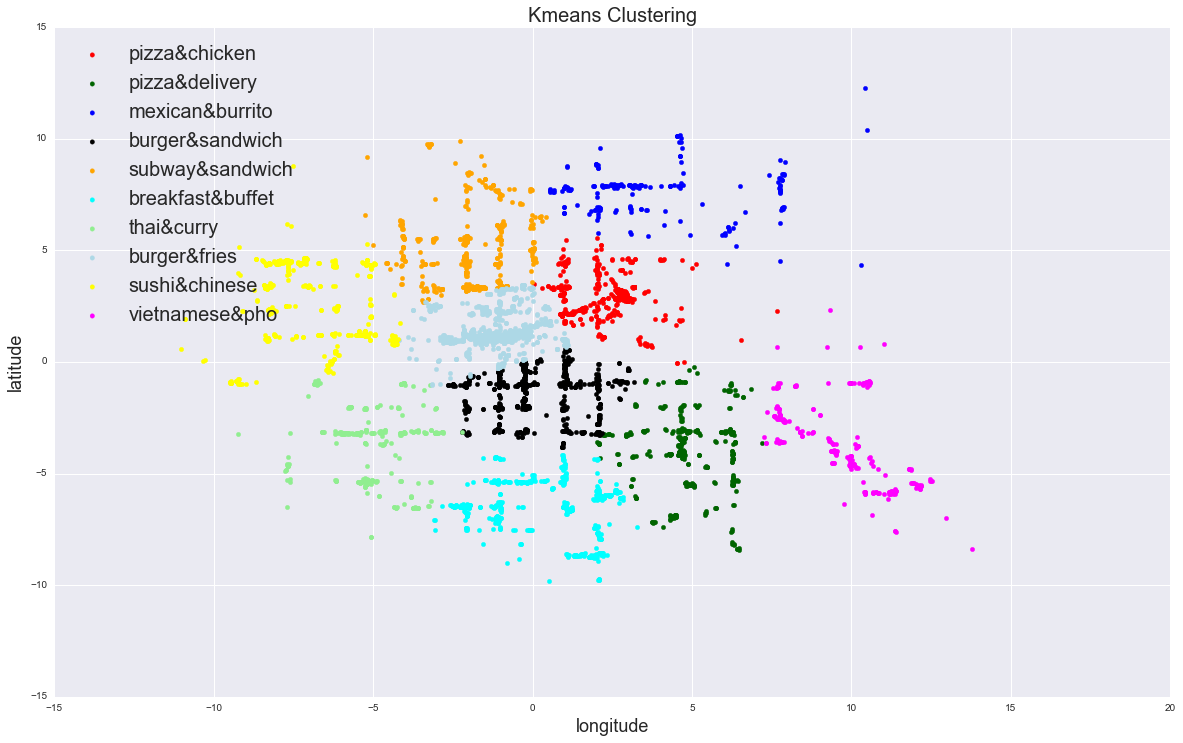

In [31]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
plot_list = []

for i in range(len(final_coordi_list)):
    tempt_array = np.asanyarray(final_coordi_list[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = dict_label[i])
    tempt_array = []

plt.rcParams["figure.figsize"] = [20,12]
plt.rcParams.update({'legend.fontsize': 20})
plt.title('Kmeans Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# Hierarchical Plotting

In [32]:
df_with_component_2 = df_with_component

In [33]:
import sklearn
import numpy as np
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import time
import numpy.random as random
from scipy.cluster.hierarchy import fcluster
import numpy
import pylab
pylab.ion()
Hia_machine = sklearn.cluster.AgglomerativeClustering(n_clusters = 10,affinity='euclidean',linkage = 'ward') 
Hia_machine.fit(matrix_final_normed2)
clusters = Hia_machine.labels_


In [34]:
clusters

array([4, 1, 4, ..., 1, 1, 5], dtype=int64)

In [35]:
df_with_component_2['cluster'] = Series(clusters,index = df_with_component_2.index)
big_total_list = []
for cluster_i in range(0,9):
    tempt_list = []
    for i in range(len(df_with_component_2)):
        if (df_with_component.cluster[i] == cluster_i):
            tempt_list.append(df_with_component_2.Human_Label[i])
    big_total_list.append(tempt_list)

In [36]:
cnt_list = []
final_label_list = []
cnttime = 0
for i in range(len(big_total_list)):
    cnttime += 1
    for j in range(0,N_CLUSTERS - 1):
        if cnttime == 1:
            final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))
            break
        else:
            if (Counter(big_total_list[i]).most_common(10)[j][0]) in final_label_list:
                continue
            else:
                final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))
final_label_list
list_val = list(range(0,N_CLUSTERS))
list_2 = []
for i in range(len(list_val)):
    list_2.append((list_val[i],final_label_list[i]))
dict_label = dict((ele, item) for ele, item in list_2)

In [37]:
final_coordi_list = []
for i in list_val:
    list_temp = []
    for j in range(len(df_with_component_2)):
        if df_with_component_2.cluster[j] == i:
            list_temp.append((matrix_final_normed2[j][0],matrix_final_normed[j][1]))
    final_coordi_list.append(list_temp)

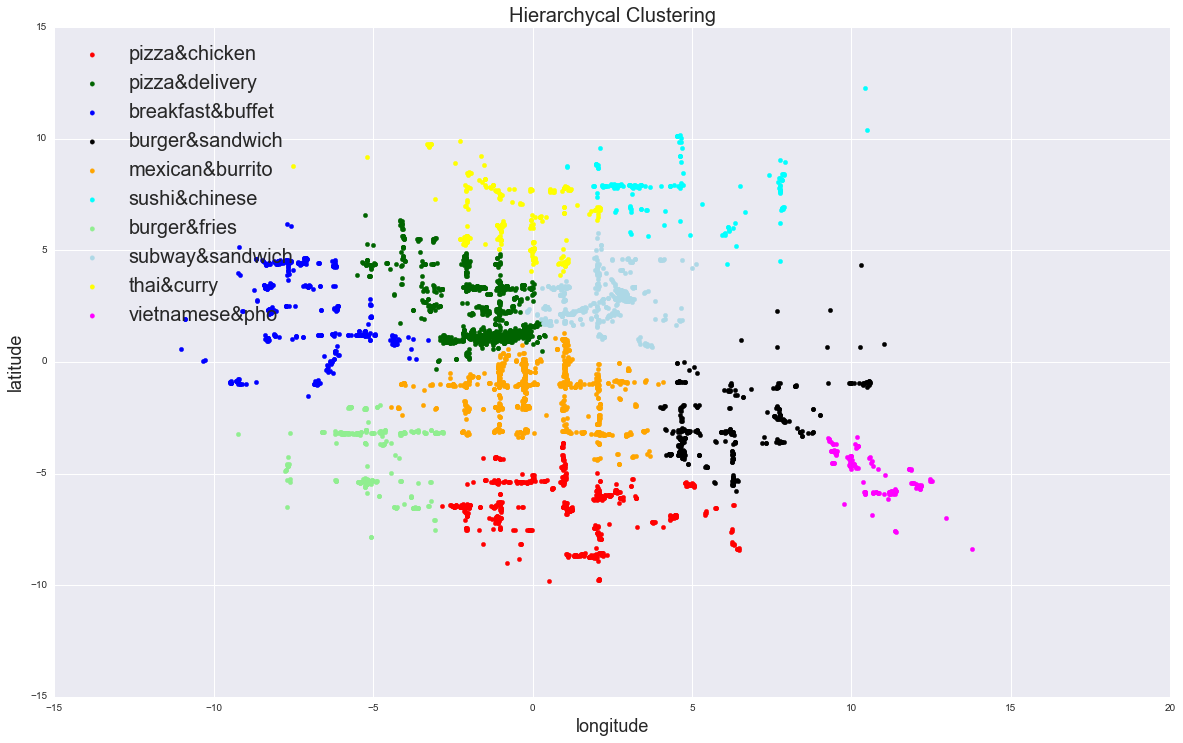

In [40]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
plot_list = []

for i in range(len(final_coordi_list)):
    tempt_array = np.asanyarray(final_coordi_list[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = dict_label[i])
    tempt_array = []

plt.rcParams["figure.figsize"] = [20,12]
plt.rcParams.update({'legend.fontsize': 20})
plt.title('Hierarchycal Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

# GMM clustering

In [41]:
df_with_component_3 = df_with_component

In [42]:
#GMM
import time
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

import seaborn as sns

gmm = mixture.GMM(n_components=10,n_iter=5000, covariance_type='spherical')
gmm.fit(matrix_final_normed2)
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
classes = gmm.predict(matrix_final_normed2)

In [43]:
df_with_component_3['cluster'] = Series(classes,index = df_with_component_3.index)
big_total_list = []
for cluster_i in range(0,9):
    tempt_list = []
    for i in range(len(df_with_component_3)):
        if (df_with_component_3.cluster[i] == cluster_i):
            tempt_list.append(df_with_component_3.Human_Label[i])
    big_total_list.append(tempt_list)

In [44]:
cnt_list = []
final_label_list = []
cnttime = 0
for i in range(len(big_total_list)):
    cnttime += 1
    for j in range(0,N_CLUSTERS - 1):
        if cnttime == 1:
            final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))
            break
        else:
            if (Counter(big_total_list[i]).most_common(10)[j][0]) in final_label_list:
                continue
            else:
                final_label_list.append((Counter(big_total_list[i]).most_common(10)[j][0]))
final_label_list
list_val = list(range(0,N_CLUSTERS))
list_2 = []
for i in range(len(list_val)):
    list_2.append((list_val[i],final_label_list[i]))
dict_label = dict((ele, item) for ele, item in list_2)

In [45]:
final_coordi_list = []
for i in list_val:
    list_temp = []
    for j in range(len(df_with_component_3)):
        if df_with_component.cluster[j] == i:
            list_temp.append((matrix_final_normed2[j][0],matrix_final_normed2[j][1]))
    final_coordi_list.append(list_temp)

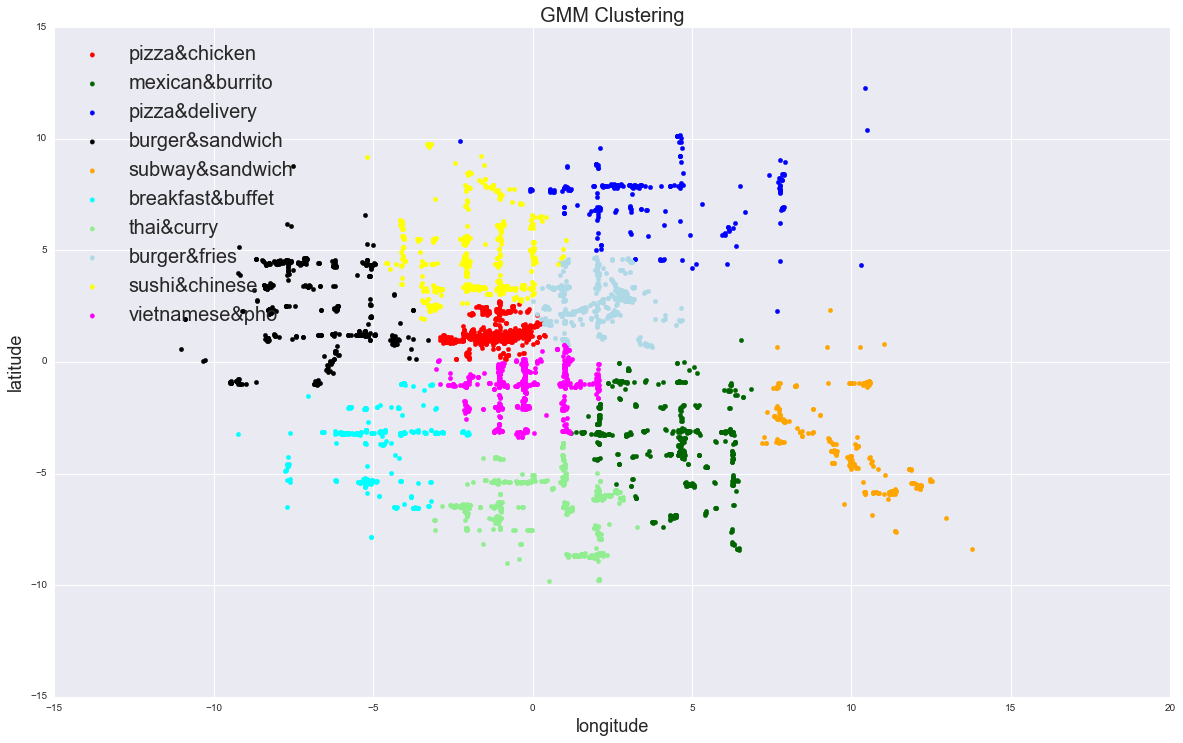

In [46]:
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'darkgreen',
                   2: 'blue', 3:'black',4:'orange',5:'cyan',6:'lightgreen',7:'lightblue',8:'yellow',9:'magenta',10:'navy_blue'
                   }
LABEL_MAP_Color_list = (list(LABEL_COLOR_MAP.values()))
plot_list = []
for i in range(len(final_coordi_list)):
    tempt_array = np.asanyarray(final_coordi_list[i])
    ll = plt.scatter(tempt_array[:,0],tempt_array[:,1], color=LABEL_MAP_Color_list[i],label = dict_label[i])
    tempt_array = []

plt.rcParams["figure.figsize"] = [20,12]
plt.rcParams.update({'legend.fontsize': 20})
plt.title('GMM Clustering', fontsize=20)
plt.xlabel('longitude', fontsize=18)
plt.ylabel('latitude', fontsize=18)
plt.legend(loc = 'upper left')
plt.show()

Compare your clusters with the results you obtained in Part 1. Use cluster comparison metrics, and also comment on which clustering appears (from your inspection of the clusters) to be more informative, and why. **(15 pts)**

In [48]:
import sklearn.metrics as metrics
ss = metrics.silhouette_score(X_train_tfidf,clusters,metric='euclidean')
print('Silhouette Score is {}'.format(ss))

Silhouette Score is -0.006533139234602991


The last homework I got the value of -0.0425774157333782 for kmeans.The value of SS for this time is larger than last one, however, this may because of the scale of coordinates are too large so they are skewed by positions too much.And the improvement may because we did the vectorization and did the re
duction of dimensions. And the normalization of vertical columns and rows will certainly make sure that the most weighted factor will not always get for each cluster.The positions are very critical to the resuls.


----------